In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [56]:
rso_data = pd.read_csv('C:\\Users\\scher\\school\\senior-thesis\\data\\rso_data_v2.txt', index_col=0)

In [57]:
rso_data

,Year,Organization,Type,Designation,Standing,Allocation
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02
1,2012,Threads,PUB,Publications RSO,12,1300.00
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99
...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00
3877,2020,Wonderworks,SISG,Service RSO,10,0.00


# Group levels of `Standing`

In [58]:
rso_data.groupby('Year').size()

Year
2012    330
2013    395
2014    400
2015    424
2016    468
2017    454
2018    423
2019    526
2020    456
dtype: int64

In [59]:
rso_2019 = rso_data[rso_data['Year'] == 2019]

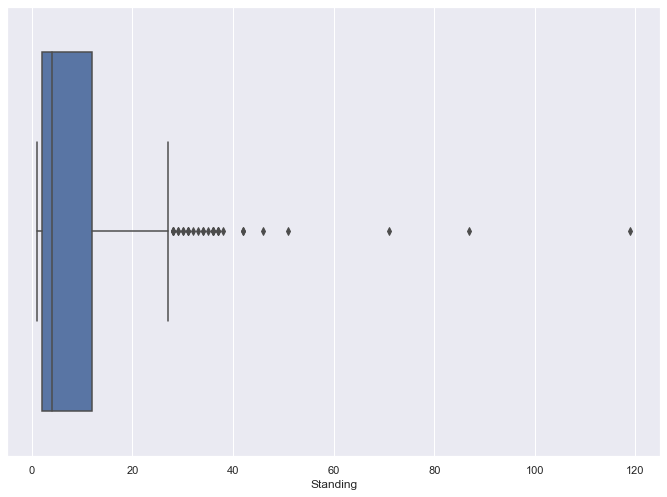

In [16]:
standing_bp = sns.boxplot(x='Standing', data=rso_2019)

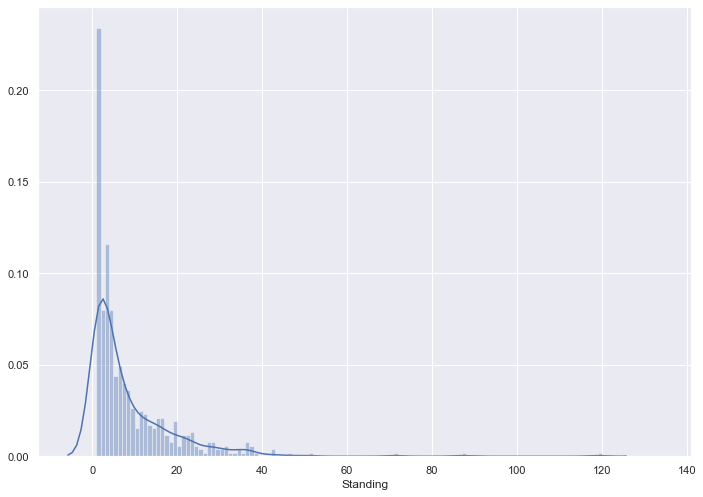

In [62]:
sns.distplot(rso_2019['Standing'], bins=np.arange(135))

In [97]:
# Create bins for every 10th percentile, which accounts for specific ASUC guidelines for funding clubs
# with a standing of 3 or lower.
bin_vals_dict = {}

for y in rso_data['Year'].unique():
    data_by_year = rso_data[rso_data['Year']==y]
    bins = np.unique([np.round(np.percentile(data_by_year['Standing'], p)) for p in np.arange(0,100,10)])
    
    bin_vals_dict[y] = bins
    
bin_vals_dict

{2012: array([ 1.,  2.,  3.,  5.,  6.,  8., 12., 14., 20.]),
 2013: array([ 1.,  2.,  3.,  5.,  7., 10., 14., 18.]),
 2014: array([ 1.,  2.,  3.,  5.,  8., 10., 14., 19.]),
 2015: array([ 1.,  2.,  3.,  5.,  8., 10., 15., 20.]),
 2016: array([ 1.,  2.,  3.,  4.,  6., 10., 14., 20.]),
 2017: array([ 1.,  2.,  3.,  5.,  7., 10., 14., 21.]),
 2018: array([ 1.,  2.,  3.,  4.,  5.,  8., 11., 16., 23.]),
 2019: array([ 1.,  2.,  3.,  4.,  6.,  9., 14., 22.]),
 2020: array([ 1.,  2.,  3.,  4.,  6.,  9., 14., 22.])}

In [112]:
def add_standing_bins(row, rso_data, bin_vals_dict):
    year = row['Year']
    standing = row['Standing']
    
    bins_by_year = bin_vals_dict[year]
    bin_num = np.argmin(abs(bins_by_year - standing))
    
    return bin_num

In [113]:
rso_data['Binned Standing'] = rso_data.apply(lambda r: add_standing_bins(r, rso_data, bin_vals_dict), axis=1)
rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,8
1,2012,Threads,PUB,Publications RSO,12,1300.00,6
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,5
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,4
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,8
...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,6
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,5
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,4
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,5


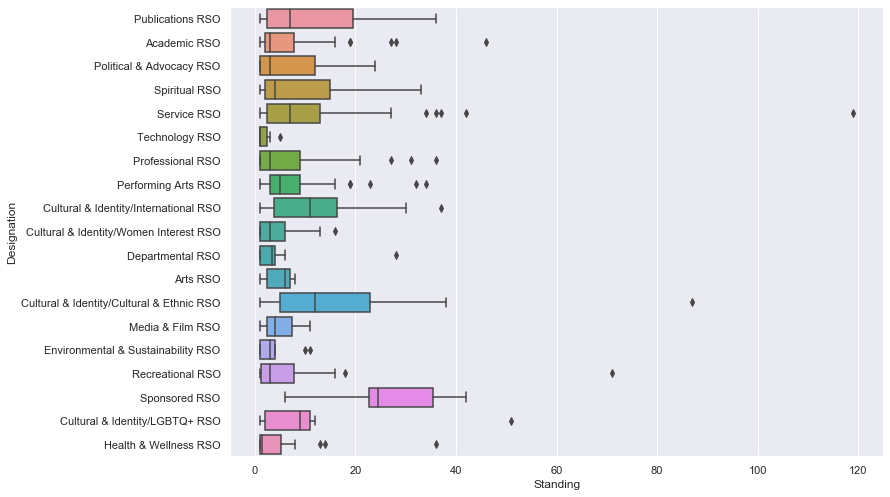

In [7]:
sns.boxplot(x='Standing', y='Designation', data=rso_2019)

# Normalization

In [114]:
norm_rso_data = rso_data.copy(deep=True)

## Normalizing values by year

In [115]:
def y_norm(data, row):
    year = row[['Year']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[data['Year'] == year]['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [116]:
norm_rso_data['norm_by_y'] = norm_rso_data.apply(lambda r: y_norm(rso_data, r), axis=1)
norm_rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing,norm_by_y
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,8,-0.008281
1,2012,Threads,PUB,Publications RSO,12,1300.00,6,-0.070396
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,5,-0.157379
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,4,-0.081032
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,8,-0.126341
...,...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,6,0.416259
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,5,-0.196901
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,4,-0.233819
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,5,-0.273947


## Normalizing values by year and designation

In [117]:
def yd_norm(data, row):
    year = row[['Year']].values[0]
    desig = row[['Designation']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[(data['Year'] == year) 
                             & (data['Designation'] == desig)]
                        ['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [118]:
norm_rso_data['norm_by_yd'] = norm_rso_data.apply(lambda r: yd_norm(rso_data, r), axis=1)
norm_rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing,norm_by_y,norm_by_yd
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,8,-0.008281,0.036367
1,2012,Threads,PUB,Publications RSO,12,1300.00,6,-0.070396,-0.025748
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,5,-0.157379,-0.181246
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,4,-0.081032,-0.036383
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,8,-0.126341,-0.081692
...,...,...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,6,0.416259,0.413214
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,5,-0.196901,-0.293152
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,4,-0.233819,-0.330070
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,5,-0.273947,-0.370198


## Normalize values by year and binned standing

In [119]:
def ys_norm(data, row):
    year = row[['Year']].values[0]
    standing = row[['Binned Standing']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[(data['Year'] == year) 
                             & (data['Binned Standing'] == standing)]
                        ['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [120]:
norm_rso_data['norm_by_ys'] = norm_rso_data.apply(lambda r: ys_norm(rso_data, r), axis=1)
norm_rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing,norm_by_y,norm_by_yd,norm_by_ys
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,8,-0.008281,0.036367,-1.297590
1,2012,Threads,PUB,Publications RSO,12,1300.00,6,-0.070396,-0.025748,-0.027429
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,5,-0.157379,-0.181246,0.023276
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,4,-0.081032,-0.036383,0.145864
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,8,-0.126341,-0.081692,-1.415649
...,...,...,...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,6,0.416259,0.413214,0.360698
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,5,-0.196901,-0.293152,-0.234523
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,4,-0.233819,-0.330070,-0.089844
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,5,-0.273947,-0.370198,-0.311569


## Normalize values by year, designation, and binned standing

In [121]:
def yds_norm(data, row):
    year = row[['Year']].values[0]
    desig = row[['Designation']].values[0]
    standing = row[['Binned Standing']].values[0]
    alloc = row[['Allocation']].values[0]
    
    year_mean = np.mean(data[(data['Year'] == year) 
                             & (data['Designation'] == desig) 
                             & (data['Binned Standing'] == standing)]
                        ['Allocation'])
    year_std = np.std(data[data['Year'] == year]['Allocation'])
                      
    return (alloc - year_mean) / year_std

In [122]:
norm_rso_data['norm_by_yds'] = norm_rso_data.apply(lambda r: yds_norm(rso_data, r), axis=1)
norm_rso_data

,Year,Organization,Type,Designation,Standing,Allocation,Binned Standing,norm_by_y,norm_by_yd,norm_by_ys,norm_by_yds
0,2012,maganda magazine,PUB,Publications RSO,23,1592.02,8,-0.008281,0.036367,-1.297590,0.045878
1,2012,Threads,PUB,Publications RSO,12,1300.00,6,-0.070396,-0.025748,-0.027429,-0.243188
2,2012,Alternative Breaks,PUB,Service RSO,10,891.07,5,-0.157379,-0.181246,0.023276,-0.066829
3,2012,BARE Magazine,PUB,Publications RSO,6,1250.00,4,-0.081032,-0.036383,0.145864,0.000000
4,2012,Berkeley Fiction Review,PUB,Publications RSO,29,1036.99,8,-0.126341,-0.081692,-1.415649,-0.072182
...,...,...,...,...,...,...,...,...,...,...,...
3874,2020,Volunteer Health Interpreters Organization,SISG,Health & Wellness RSO,15,4300.00,6,0.416259,0.413214,0.360698,0.303370
3875,2020,Volunteer Income Tax Assistance Program,SISG,Service RSO,8,480.00,5,-0.196901,-0.293152,-0.234523,-0.045412
3876,2020,Volunteers Around the World at Berkeley,SISG,Service RSO,7,250.00,4,-0.233819,-0.330070,-0.089844,-0.020064
3877,2020,Wonderworks,SISG,Service RSO,10,0.00,5,-0.273947,-0.370198,-0.311569,-0.122458


In [123]:
norm_rso_data.to_csv('C:\\Users\\scher\\school\\senior-thesis\\data\\norm_rso_data.txt')